In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import random
import shutil
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, array_to_img
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras


2025-02-26 10:31:34.290973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-26 10:31:34.645037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-26 10:31:34.649260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-26 10:31:36.586149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_dir = 'data'
for class_name in os.listdir(data_dir):
    class_size = len(os.listdir(os.path.join(data_dir,class_name)))
    #print(f"class {class_name} : {class_size} images")

    print(class_name)

Strawberry___Leaf_scorch
Apple___healthy
Corn___Common_rust
Grape___healthy
Tomato___Bacterial_spot
Soybean___healthy
Tomato___Leaf_Mold
Pepper,_bell___Bacterial_spot
Corn___Northern_Leaf_Blight
Tomato___Early_blight
Apple___Apple_scab
Potato___Early_blight
Raspberry___healthy
Pepper,_bell___healthy
Tomato___Septoria_leaf_spot
Orange___Haunglongbing_(Citrus_greening)
Cherry___Powdery_mildew
Tomato___Spider_mites Two-spotted_spider_mite
Grape___Black_rot
Apple___Black_rot
Background_without_leaves
Peach___healthy
Grape___Esca_(Black_Measles)
Tomato___Target_Spot
Blueberry___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Potato___Late_blight
Squash___Powdery_mildew
Tomato___healthy
Tomato___Tomato_mosaic_virus
Strawberry___healthy
Peach___Bacterial_spot
Tomato___Late_blight
Corn___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Cherry___healthy
Potato___healthy
Apple___Cedar_apple_rust
Corn___Cercospora_leaf_spot Gray_leaf_spot


In [4]:
for class_name in os.listdir(data_dir):
    class_size = len(os.listdir(os.path.join(data_dir,class_name)))
    print(f"class {class_name} : {class_size} images")

class Strawberry___Leaf_scorch : 1109 images
class Apple___healthy : 1645 images
class Corn___Common_rust : 1192 images
class Grape___healthy : 1000 images
class Tomato___Bacterial_spot : 2127 images
class Soybean___healthy : 5090 images
class Tomato___Leaf_Mold : 1000 images
class Pepper,_bell___Bacterial_spot : 1000 images
class Corn___Northern_Leaf_Blight : 1000 images
class Tomato___Early_blight : 1000 images
class Apple___Apple_scab : 1000 images
class Potato___Early_blight : 1000 images
class Raspberry___healthy : 1000 images
class Pepper,_bell___healthy : 1478 images
class Tomato___Septoria_leaf_spot : 1771 images
class Orange___Haunglongbing_(Citrus_greening) : 5507 images
class Cherry___Powdery_mildew : 1052 images
class Tomato___Spider_mites Two-spotted_spider_mite : 1676 images
class Grape___Black_rot : 1180 images
class Apple___Black_rot : 1000 images
class Background_without_leaves : 1143 images
class Peach___healthy : 1000 images
class Grape___Esca_(Black_Measles) : 1383 

/tmp/ipykernel_11407/1159132220.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=image_count, y=classes, palette="viridis")


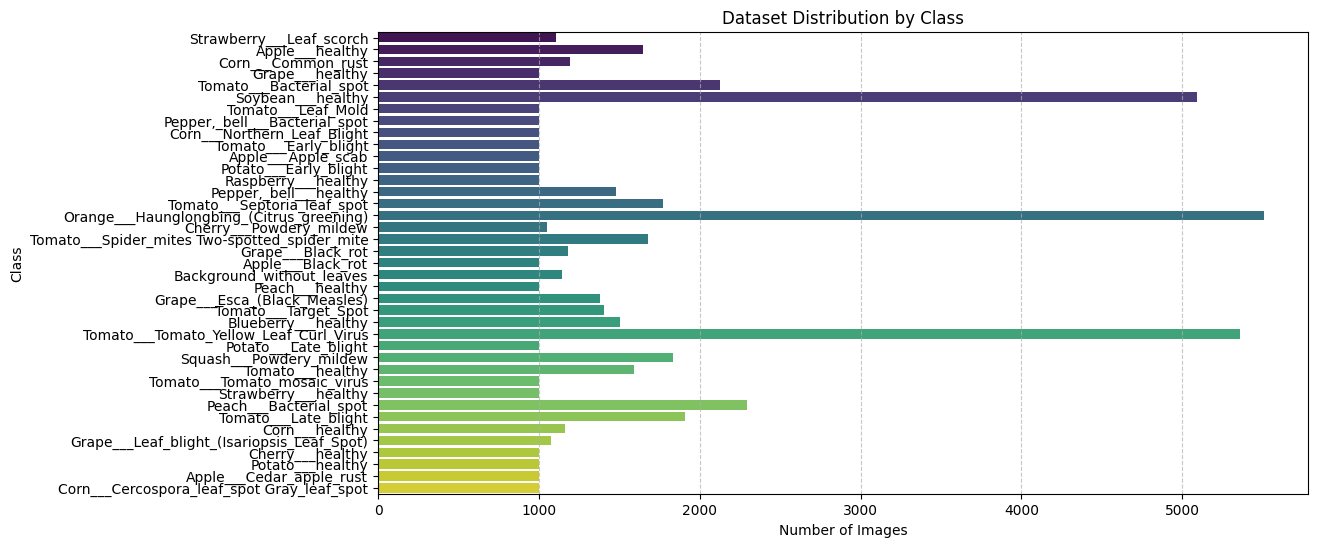

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

classes = [
    "Strawberry___Leaf_scorch", "Apple___healthy", "Corn___Common_rust", "Grape___healthy",
    "Tomato___Bacterial_spot", "Soybean___healthy", "Tomato___Leaf_Mold", "Pepper,_bell___Bacterial_spot",
    "Corn___Northern_Leaf_Blight", "Tomato___Early_blight", "Apple___Apple_scab", "Potato___Early_blight",
    "Raspberry___healthy", "Pepper,_bell___healthy", "Tomato___Septoria_leaf_spot", 
    "Orange___Haunglongbing_(Citrus_greening)", "Cherry___Powdery_mildew", 
    "Tomato___Spider_mites Two-spotted_spider_mite", "Grape___Black_rot", "Apple___Black_rot", 
    "Background_without_leaves", "Peach___healthy", "Grape___Esca_(Black_Measles)", "Tomato___Target_Spot", 
    "Blueberry___healthy", "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Potato___Late_blight", 
    "Squash___Powdery_mildew", "Tomato___healthy", "Tomato___Tomato_mosaic_virus", 
    "Strawberry___healthy", "Peach___Bacterial_spot", "Tomato___Late_blight", "Corn___healthy", 
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Cherry___healthy", "Potato___healthy", 
    "Apple___Cedar_apple_rust", "Corn___Cercospora_leaf_spot Gray_leaf_spot"
]

image_count  = [
    1109, 1645, 1192, 1000, 2127, 5090, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1478, 
    1771, 5507, 1052, 1676, 1180, 1000, 1143, 1000, 1383, 1404, 1502, 5357, 1000, 1835, 
    1591, 1000, 1000, 2297, 1909, 1162, 1076, 1000, 1000, 1000, 1000
]

plt.figure(figsize=(12, 6))
sns.barplot(x=image_count, y=classes, palette="viridis")
plt.xlabel("Number of Images")
plt.ylabel("Class")
plt.title("Dataset Distribution by Class")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# train test validation 

input_dir = 'data'
output_dir = 'split_dataset'

train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

for split in ['train','val','test']:
    os.makedirs(os.path.join(output_dir,split),exist_ok=True)

for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir,class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    total_images = len(images)
    train_count = int(total_images*train_ratio)
    val_count = int(total_images*val_ratio)
    test_count = total_images - train_count - val_count

    train_images = images[:train_count]
    val_images = images[train_count:train_count+val_count]
    test_images = images[train_count+val_count:]

    def copy_images(image_list,split_name):
        split_class_dir = os.path.join(output_dir,split_name,class_name)
        os.makedirs(split_class_dir,exist_ok=True)
        for img in image_list:
            shutil.copy(os.path.join(class_path, img), os.path.join(split_class_dir, img))
    
    copy_images(train_images, "train")
    copy_images(val_images, "val")
    copy_images(test_images, "test")

print("Dataset successfully split into train, val, and test sets!")




Dataset successfully split into train, val, and test sets!
